# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2025
## Lab 5: Gordus 
## February 28, 2025

#  1. Thermodynamics: 2-State Transitions

Today we’re going to explore the thermodynamic properties of a two-state equilibrium between folding states **F** and **U**.

## Libraries you will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A. Define Constants

For a two-state equilibrium between folding states **F** and **U**, we will need to define; 

$\Delta$H(Tm) -  the enthalpy difference between **U** and **F** at the transition temperature. <br>
Tm -  the transition temperature.<br>
$\Delta$Cp -  the heat capacity difference between **U** and **F**.

Experimentally, $\Delta$H can be measured through calorimetry, which enables us to calculate $\Delta$G and $\Delta$S.

We know that $\Delta$G(T) = $\Delta$H(T) - T*$\Delta$S(T)  
Because @ Tm the $\Delta$G(Tm) = 0  we can write the expression:

$\Delta$G(Tm) = 0 = $\Delta$H(Tm) - Tm*$\Delta$S(Tm) 

which lets us calculate the entropy difference as;

$\Delta$S(Tm) = $\Delta$H(Tm)/Tm.

I will provide you with the following:

R = 1.987 x 10<sup>-3</sup> kcal/mol·K<br>
Tm = 323.15 <br>
$\Delta$H(Tm) = 100 kcal/mol<br>
$\Delta$Cp = 0 <br>

**Do the following:**

Calculate $\Delta$S(Tm) in kcal/mol.

# <font color='red'>Student Input Cell: 2 points</font>   

In [2]:
R = 1.987 * 10**(-3)
Tm = 323.15
dHTm = 100
dCp = 0
deltaSTm = dHTm / Tm # = (kcal/(mol*K)) * 1/K = kcal/mol
print(deltaSTm)

0.3094538140182578


## B. Define Thermodynamic Functions

From the $\Delta$H(Tm), $\Delta$S(Tm) and $\Delta$Cp, we can calcualte the enthalpy, entropy, and free energy differences at any temperature:

1. $\Delta$H(T) = $\Delta$H(Tm) + $\Delta$Cp(T - Tm)
2. $\Delta$S(T) = $\Delta$S(Tm) + $\Delta$Cp*ln(T / Tm)
3. $\Delta$G(T) = $\Delta$H(T) - T*$\Delta$S(T)

**Do the following:**

1. Plot $\Delta$H(T) and T*$\Delta$S(T) in the same plot for the temperature range (in K): (273, 373).
2. Plot $\Delta$G(T) in a separate plot for the same temperature range.

# <font color='red'>Student Input Cell: 10 points</font>   

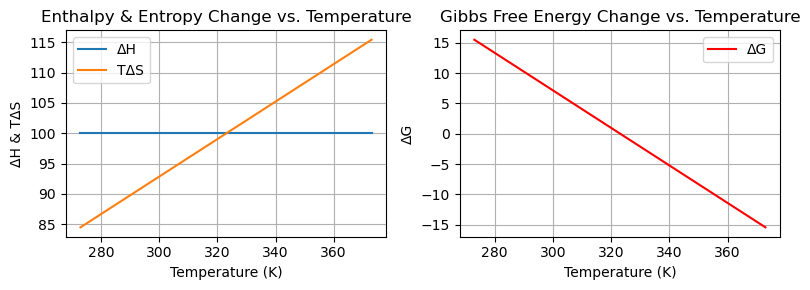

In [3]:
# T = x values 
T = np.linspace(273, 373, 100)
dH_t = dHTm + dCp * (T - Tm)
dS_t = deltaSTm + dCp * np.log(T/Tm)
TdS_t = T * dS_t
dG_t = dH_t - TdS_t

# Plot
plt.figure(figsize=(8, 3))

# Plot dH_t vs T
# Plot dS_t vs T
plt.subplot(1, 2, 1)
plt.plot(T, dH_t, label="ΔH")
plt.plot(T, TdS_t, label="TΔS")
plt.xlabel("Temperature (K)")
plt.ylabel("ΔH & TΔS")
plt.title("Enthalpy & Entropy Change vs. Temperature")
plt.grid(True) 
plt.legend()

# Plot dG_t vs T
plt.subplot(1, 2, 2)
plt.plot(T, dG_t, '-r', label="ΔG")
plt.xlabel("Temperature (K)")
plt.ylabel("ΔG")
plt.title("Gibbs Free Energy Change vs. Temperature")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## C. Develop Expressions for the Statistical Weights and Probabilities

The statistical weight (which is essentially an equilibrium constant) can be determined at any temperature by the expression:

4. K = exp[-$\Delta$G / RT]

The partition function is just the sum of all the statistical weights at any temperature:

5. Q = $\Sigma$K

and the probability of any state is:

6. P = K / Q

This is shown in the table below. The free energy difference, $\Delta$Gu (Gu - Gf), allows us to determine all the expressions you require to calculate the probabilities.

<img src="http://www.gordus.org/public_images/Hilser.png" style="width: 800px;"/>

**Do the following:**

1. Define the statistical weight for both **F** and **U** states over the temperature range:(273, 373).
2. Calculate the partition function as a function of these weights.
3. Calculate the probability of being in state **F**.
4. Calculate the probability of being in state **U**.
5. Plot the **F** and **U** probabilities in the same plot for the temperature range: (273, 373).
4. Plot $\Delta$G(T) in a separate plot for the same temperature range.

# <font color='red'>Student Input Cell: 12 points</font>   

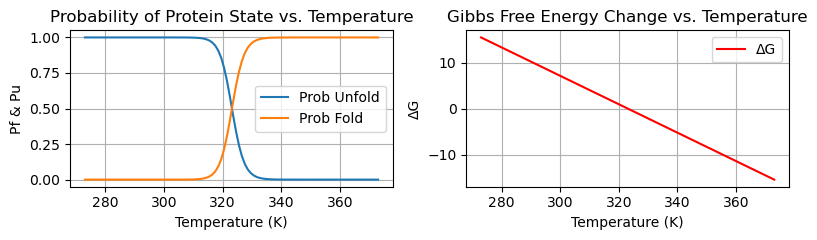

In [4]:
dGf = 0
dGu = dG_t - dGf # dG_t was calculated before 
Kf = 1
Ku = np.exp(-(dGu)/(R*T))
Q = Kf + Ku
Pf = Kf / Q
Pu = Ku / Q

plt.figure(figsize=(8, 2.5))
plt.subplot(1, 2, 1)
plt.plot(T, Pf, label="Prob Unfold")
plt.plot(T, Pu, label="Prob Fold")
plt.xlabel("Temperature (K)")
plt.ylabel("Pf & Pu")
plt.title("Probability of Protein State vs. Temperature")
plt.grid(True) 
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T, dG_t, '-r', label="ΔG")
plt.xlabel("Temperature (K)")
plt.ylabel("ΔG")
plt.title("Gibbs Free Energy Change vs. Temperature")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Conformational Equilibrium (2 - State)

I told you in class that in order to simulate a two-state transition, you need two parameters ($\Delta$H and $\Delta$S), which are constant and therefore are the same at every temperature. **This is technically not true in most cases.** Both entropy and enthalpy are often temperature dependent, which is determined by the heat capacity difference ($\Delta$Cp), obeying the following relationships:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_1.png" />

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_2.png"/>

This just means that instead of writing the Gibbs energy at any temperature (i.e., $\Delta$G(T)) in terms of two constant parameters (yellow), as we did in class and as reproduced here:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3a.png"/>

Equation 3a becomes

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3b.png"/>

where the $\Delta$H(T) and $\Delta$S(T) vary with temperature according to eqs. 1 and 2. This means that to get an expression for the Gibbs energy at any temperature (i.e. $\Delta$G(T)) expressed in terms of constants, you just need to substitute eqs. 1 & 2 into eq. 3b and you get:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3c.png"/>

which has four constants(yellow), the enthalpy and entropy at some reference temperature, T<sub>ref</sub> (i.e., $\Delta$H(T<sub>ref</sub>), $\Delta$S(T<sub>ref</sub>)), and $\Delta$Cp.

The next important issue regards rewriting equation 3a in terms of the transition temperature (Tm) and the enthalpy at the Tm (i.e., $\Delta$H(Tm)) instead of in terms of $\Delta$H and $\Delta$S. The reason is entirely practical; it allows you to specify which temperature is the midpoint of the transition between the two states (i.e., where $\Delta$G = 0). We can get this by noting that at the transition temperature (i.e., T = Tm), equation 3a gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6.png"/>

which, when rearranged, yields:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3d.png"/>

That allows us to rewrite equation 3a as:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3e.png" />

Note, this is exactly equivalent to eq. 3a. Thus, to simulate a two-transition when $\Delta$Cp = 0, you still need just two parameters, the enthalpy difference at Tm (i.e., $\Delta$H(Tm)) and the transition temperature (Tm), both of which are constant (yellow).

In the case when $\Delta$Cp $\neq$ 0, you need to start with eq. 3c, which after subsituting eq. 3d in place of $\Delta$S(T<sub>ref</sub>) becomes:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4a.png" />

And upon rearranging gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4b.png" />

where you can see that there are just 3 constants (yellow), and that when there is no heat capacity difference (i.e., $\Delta$Cp = 0), the second part of the equation (i.e. after the '+' sign) goes to 0, and equation 4b reduces to eq. 3e. Thus, eq. 4b is the general expression for the energy difference between two states in a two-state transition. It is the expression you will use in every simulation where the temperature dependence of a conformational transition is modeled.

## Do the following:

**1. Free Energy Simulations I (Exploring Enthalpy)**: On one graph, plot $\Delta$G vs. T (273 -> 373 K) for the following three cases:

a. Case 1: $\Delta$H = 50 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
c. Case 3: $\Delta$H = 150 kcal/mol, Tm = 50C, $\Delta$Cp = 0.

**NOTE: Tm is in Celsius, but the calculations should be in Kelvin!**

**NOTE: It may help to write a function for $\Delta$G, first.**

By inspecting the graph, what's the difference between these cases?

# <font color='red'>Student Input Cell: 6 points</font>   

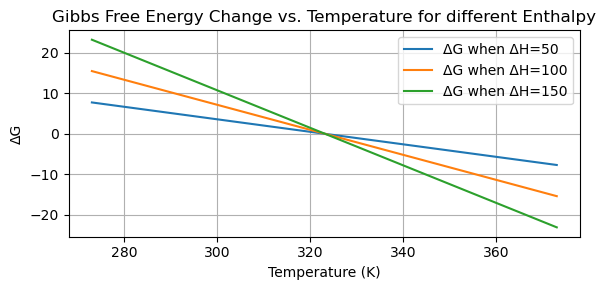

In [5]:
def delta_G(H, dCp, Tm, T):
    G = H * (1 - (T/Tm)) + dCp * (T * (1 - (np.log(T/Tm))) - Tm)
    return G

plt.figure(figsize=(6, 3))
Hs = [50, 100, 150]
for H in Hs:
    G = delta_G(H, dCp, Tm, T)
    plt.plot(T, G, label=f"ΔG when ΔH={H}")

plt.xlabel("Temperature (K)")
plt.ylabel("ΔG")
plt.title("Gibbs Free Energy Change vs. Temperature for different Enthalpy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##-------------------------------------------- ##
## Answer the question above as a comment below##
##-------------------------------------------- ##
# higher the change in enthapy (heat energy transfer in chem rxn), the 
# greater the spontaneity of the forward reaction, with higher T.
# for lower T, no spontaneous reaction will occur.
# the lower the enthalpy (dH) the less spontaneous the forward rxn.

**2. Population Simulations I:**
For a 2-state transition, write the expression for the statistical weights and the partition function.

a. For each case from Question 1, make a plot of the probability of the folded and unfolded states vs. T(273 -> 373 K). <br>
b. On one graph, plot the folded probability vs. T for each case. What do you observe?

# <font color='red'>Student Input Cell: 10 points</font>   

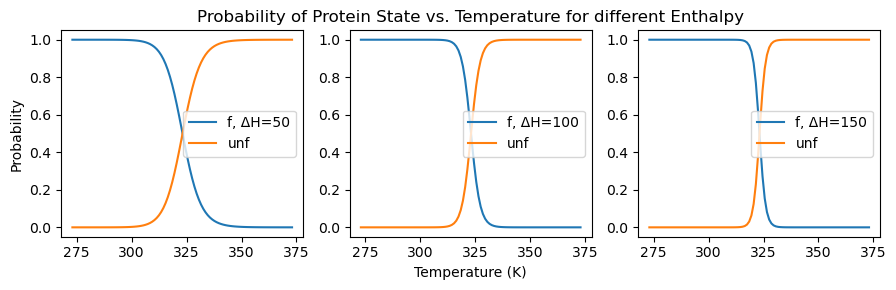

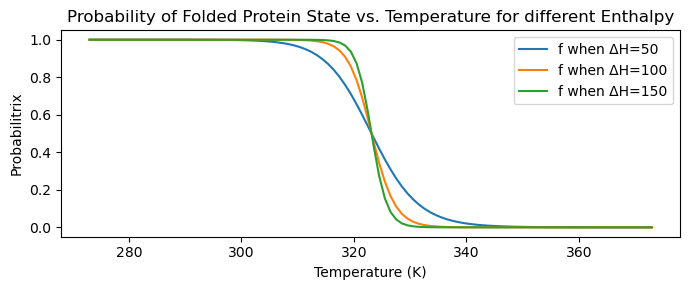

In [6]:
def prob_calc(G, T, R): # nissan gtr
    expo = -(G)/(T*R)
    Ku = np.exp(expo)
    Q = Kf + Ku
    pf = Kf / Q
    pu = Ku / Q
    answer = [pf, pu]
    return answer

# Plotting 3 Cases
Hs = [50, 100, 150]
plt.figure(figsize=(9, 3))
subplot_posish = 1
for i in range(len(Hs)):
    G = delta_G(Hs[i], dCp, Tm, T)
    ans = prob_calc(G, T, R)
    plt.subplot(1, 3, subplot_posish)
    plt.plot(T, ans[0], label=f"f, ΔH={Hs[i]}")
    plt.plot(T, ans[1], label=f"unf")
    if i == 0:
        plt.ylabel("Probability")
    if i == 1:
        plt.xlabel("Temperature (K)")
        plt.title("Probability of Protein State vs. Temperature for different Enthalpy")
    subplot_posish += 1
    plt.legend()
plt.tight_layout()
plt.show()

# Plotting Folded Probabilities for all three
plt.figure(figsize=(7, 3))
for i in range(len(Hs)):
    G = delta_G(Hs[i], dCp, Tm, T)
    ans = prob_calc(G, T, R)
    plt.plot(T, ans[0], label=f"f when ΔH={Hs[i]}")
    plt.ylabel("Probabilitrix")
    plt.xlabel("Temperature (K)")
    plt.title("Probability of Folded Protein State vs. Temperature for different Enthalpy")
    plt.legend()
plt.tight_layout()
plt.show()

##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##
# larger change in enthapy (ΔH) between un//folded states steepens the transition zone 
# and sharpens the probability curves between protein states. protein retains a high 
# probability of being in the folded state for higher T when the ΔH is greater (green line), 
# but then it more quickly transitions to lower probability than for lower ΔH. 

**3. Free Energy Simulations II (Exploring Heat Capacity)**: On one graph plot $\Delta$G vs. T (in Kelvin) for the following three cases:

a. Case 1: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0 cal/(mol * K). <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 1.500 kcal/(mol * K). <br>
c. Case 3: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 3.0 kcal/(mol * K). <br>

By inspecting the graph, what is the difference between these cases?

# <font color='red'>Student Input Cell: 8 points</font>   

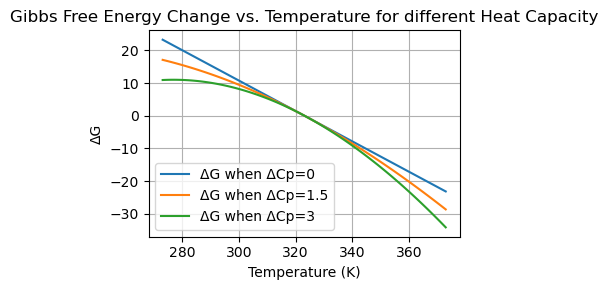

In [7]:
dCps = [0, 1.5, 3]
plt.figure(figsize=(4, 3))
for c in dCps:
    G = delta_G(H, c, Tm, T)
    plt.plot(T, G, label=f"ΔG when ΔCp={c}")
plt.xlabel("Temperature (K)")
plt.ylabel("ΔG")
plt.title("Gibbs Free Energy Change vs. Temperature for different Heat Capacity")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##
# the more positive and greater change in heat capacity (+ΔCp) the lower the ΔG for the reaction across T
# except for at the Transition Temperature (Tm)

**4. Population Simulations**:

For each case from Question 3, make a plot of probability of the folded and unfolded states vs. T (between 150 and 400 K). <br>


What do you observe? How do you interpret it?

# <font color='red'>Student Input Cell: 8 points</font>   

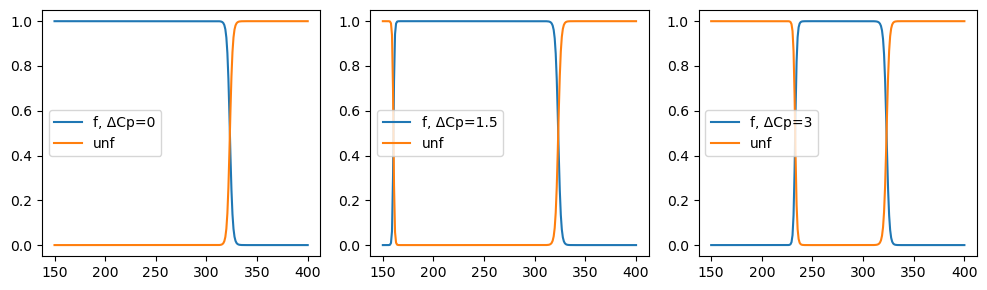

In [8]:
# Plotting 3 Cases
T = np.linspace(150, 400, 250)

plt.figure(figsize=(10, 3))
subplot_posish = 1
for c in dCps:
    G = delta_G(H, c, Tm, T)
    ans = prob_calc(G, T, R)
    plt.subplot(1, 3, subplot_posish)
    plt.plot(T, ans[0], label=f"f, ΔCp={c}")
    plt.plot(T, ans[1], label=f"unf")
    if i == 0:
        plt.ylabel("Probability")
    if i == 1:
        plt.xlabel("Temperature (K)")
        plt.title("Probability of Protein State vs. Temperature for different Heat Capacity")
    subplot_posish += 1
    plt.legend()
plt.tight_layout()
plt.show()

##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##

# the greater and more positive the change in heat capacity allows for a 2nd reversal of protein
# state probability that shifts towards the 1st observed 323K transition temperature. 
# this can be interpreted as the unfolded protein state having a higher probability
# of being observed at low and gradually higher T as heat capacity change increases.